In [23]:
import numpy as pn
import pandas as ps
%matplotlib inline
import matplotlib.pyplot as mt
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [2]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train.shape

(60000, 28, 28)

In [3]:
y_train.shape

(60000,)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)

In [10]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [11]:
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
def plot_sample(X, y, index):
    mt.figure(figsize = (15,2))
    mt.imshow(X[index])
    mt.xlabel(classes[y[index]])

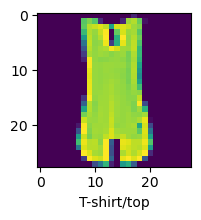

In [18]:
plot_sample(X_train,y_train,4)

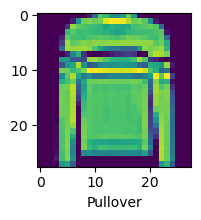

In [20]:
plot_sample(X_train, y_train, 5)

### Normalize the Data 

In [21]:
X_train=X_train/255
X_test=X_test/255

### Build simple Artificial neural network for image classification(ANN)

In [32]:
ann = models.Sequential([
        layers.Flatten(input_shape=(28,28,1)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.6360 - accuracy: 0.7934
Epoch 2/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4531 - accuracy: 0.8425
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4128 - accuracy: 0.8550
Epoch 4/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3860 - accuracy: 0.8650
Epoch 5/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3663 - accuracy: 0.8720


In [33]:
# Our Accuracy with ANN Model is 87%

In [34]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 4ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.86      0.81      1000
           1       0.98      0.96      0.97      1000
           2       0.80      0.72      0.76      1000
           3       0.91      0.81      0.86      1000
           4       0.75      0.79      0.77      1000
           5       0.94      0.96      0.95      1000
           6       0.62      0.66      0.64      1000
           7       0.93      0.92      0.93      1000
           8       0.96      0.94      0.95      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



### Build simple Convolutional neural network for image classification(CNN)

In [36]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [37]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4659 - accuracy: 0.8311
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3089 - accuracy: 0.8873
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2662 - accuracy: 0.9035
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2361 - accuracy: 0.9129
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2104 - accuracy: 0.9220


In [39]:
#As we can clearly see that after implementing CNN Model Our ACuuracy has automatically Increases

In [40]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2680 - accuracy: 0.9051


[0.26803120970726013, 0.9050999879837036]

In [41]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[4.23483471e-08, 1.32858826e-08, 1.28921833e-08, 1.68316944e-10,
        1.96723526e-10, 7.31609543e-05, 4.93007279e-09, 1.59037605e-04,
        1.50735746e-09, 9.99767721e-01],
       [4.53649445e-05, 5.54956578e-08, 9.99486685e-01, 1.00645984e-07,
        4.04374412e-04, 4.15850252e-08, 6.31456132e-05, 1.41817358e-09,
        6.99850915e-08, 5.63485152e-08],
       [3.49180254e-06, 9.99995828e-01, 2.58726800e-07, 9.92193208e-08,
        1.15524756e-07, 3.78649820e-11, 1.13572966e-07, 2.99709424e-10,
        1.67001971e-07, 3.29477105e-11],
       [4.82962150e-07, 9.99992132e-01, 2.28847711e-07, 6.79727373e-06,
        3.25088251e-07, 1.33343314e-09, 4.13048014e-08, 4.61272833e-08,
        3.59228700e-08, 1.46366874e-09],
       [9.97076929e-02, 8.09734775e-06, 1.61910281e-02, 8.09393264e-03,
        6.32599071e-02, 1.25289853e-05, 8.12681258e-01, 2.78294829e-06,
        3.17687118e-05, 1.10136843e-05]], dtype=float32)

In [42]:
y_classes = [pn.argmax(element) for element in y_pred]
y_classes[:5]

[9, 2, 1, 1, 6]

In [43]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

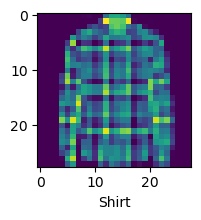

In [46]:
plot_sample(X_test, y_test,7)

In [47]:
classes[y_classes[7]]

'Shirt'

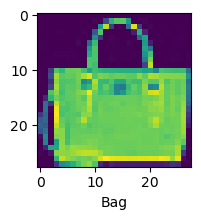

In [54]:
plot_sample(X_test, y_test,69)

In [55]:
classes[y_classes[69]]

'Bag'